In [73]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
import numpy as np

In [61]:
df = pd.read_csv('nasdaq100.csv',sep=';')
df.head()

,Date,Starting (USD),Ending (USD)
0,01.01.24,16800,16500
1,01.12.23,15900,16100
2,01.11.23,15800,15300
3,01.10.23,16100,16200
4,01.09.23,16300,15700


In [62]:
df.isnull().sum()

Date              0
Starting (USD)    0
Ending (USD)      0
dtype: int64

In [63]:
df = df.drop(columns=['Date'])
df.head()

,Starting (USD),Ending (USD)
0,16800,16500
1,15900,16100
2,15800,15300
3,16100,16200
4,16300,15700


Text(0.5, 1.0, 'Stock Price')

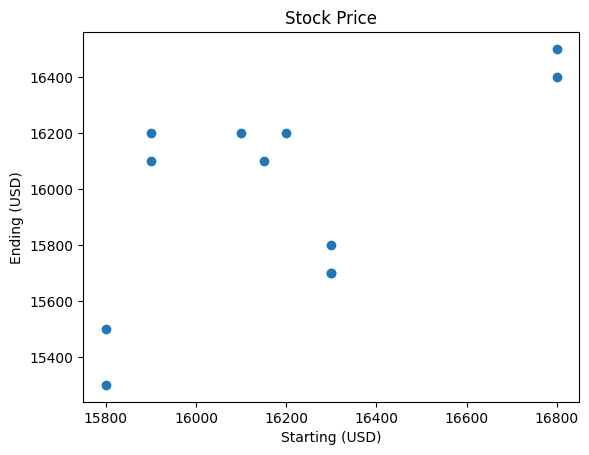

In [64]:
plt.scatter(df['Starting (USD)'],df['Ending (USD)'])
plt.xlabel('Starting (USD)')
plt.ylabel('Ending (USD)')
plt.title('Stock Price')

In [94]:
x = df[['Starting (USD)']]




In [95]:
y = df['Ending (USD)']

Text(0.5, 1.0, 'Stock Price')

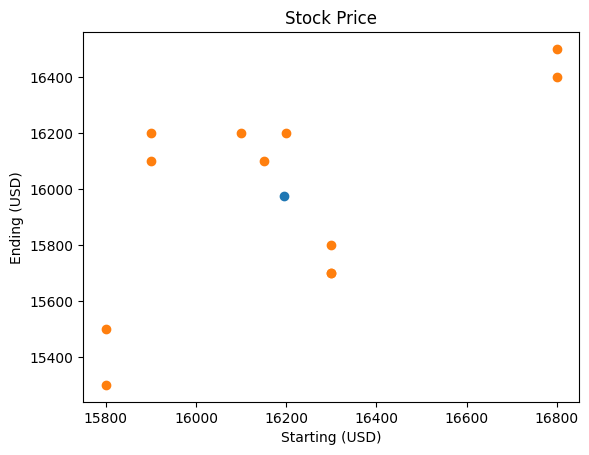

In [96]:
plt.scatter(x.mean(),y.mean())
plt.scatter(df['Starting (USD)'],df['Ending (USD)'])
plt.xlabel('Starting (USD)')
plt.ylabel('Ending (USD)')
plt.title('Stock Price')

In [97]:
Reg = LinearRegression()


In [98]:
Reg.fit(x,y)

LinearRegression()

In [99]:
Reg.coef_

array([0.65258293])

In [100]:
Reg.intercept_

5405.875557022609

In [102]:
Reg.predict(pd.DataFrame([[16700]], columns=['Starting (USD)']))

array([16304.0105628])

In [103]:
df['predict_y'] = Reg.predict(x)
df.head()

,Starting (USD),Ending (USD),predict_y
0,16800,16500,16369.268856
1,15900,16100,15781.944215
2,15800,15300,15716.685922
3,16100,16200,15912.460802
4,16300,15700,16042.977389


Text(0.5, 1.0, 'Stock Price')

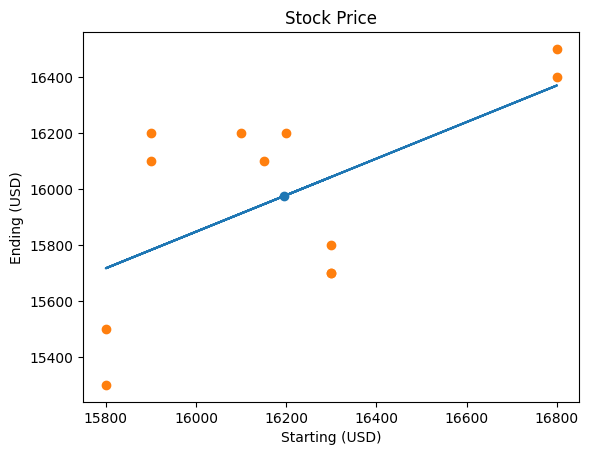

In [106]:
plt.plot(x,df['predict_y'])
plt.scatter(x.mean(),y.mean())
plt.scatter(df['Starting (USD)'],df['Ending (USD)'])
plt.xlabel('Starting (USD)')
plt.ylabel('Ending (USD)')
plt.title('Stock Price')


In [108]:
df['lost'] = df['Ending (USD)']- df['predict_y']
df.head()


,Starting (USD),Ending (USD),predict_y,lost
0,16800,16500,16369.268856,130.731144
1,15900,16100,15781.944215,318.055785
2,15800,15300,15716.685922,-416.685922
3,16100,16200,15912.460802,287.539198
4,16300,15700,16042.977389,-342.977389


In [109]:
from sklearn.metrics import mean_squared_error,median_absolute_error

In [110]:
mse = mean_squared_error(df['Ending (USD)'],df['predict_y'])
mse

80411.23397700385

In [118]:
mae = median_absolute_error(df['Ending (USD)'],df['predict_y'])
mae

265.2582934477641

In [119]:
sum(abs(df['lost']))/len(x)



260.3840017604666

In [120]:
Reg.score(x,y)

0.3577804940272571

In [122]:
from sklearn.metrics import r2_score
score = r2_score(y,df['predict_y'])
print(score)

0.3577804940272571
